In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS.json')

In [3]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  36%|███▌      | 5846/16384 [00:02<00:03, 2768.30it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5846



DR 1:  93%|█████████▎| 30613/32768 [00:07<00:00, 3794.82it/s]

Epoch 30117: reducing learning rate of group 0 to 6.0000e-04.
Epoch 30405: reducing learning rate of group 0 to 1.2000e-04.
Epoch 30662: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  96%|█████████▌| 31508/32768 [00:08<00:00, 3840.56it/s]


Epoch 30919: reducing learning rate of group 0 to 4.8000e-06.
Epoch 31176: reducing learning rate of group 0 to 9.6000e-07.
Epoch 31433: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 31508
AUC predicting P(win):				 0.8491139514948454
Estimated Utility	 Mean Error:			 0.6180803667965038
Estimated Utility	 Mean Absolute Error:	 0.6348574410503396



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1182.21it/s]


Predicted mu Gammas:  tensor(0.9703, grad_fn=<MinBackward1>) tensor(1.0064, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0420, grad_fn=<MinBackward1>) tensor(0.0884, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 1:   0%|          | 67/32768 [00:00<00:49, 665.22it/s]

Epoch 00125: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 210/32768 [00:00<00:46, 698.72it/s]

Epoch 00226: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 352/32768 [00:00<00:47, 688.86it/s]

Epoch 00327: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 422/32768 [00:00<00:46, 690.09it/s]

Epoch 00428: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 544/32768 [00:00<00:47, 683.18it/s]


Epoch 00529: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 544
DR 1 Number of samples:  torch.Size([6673, 2])
DR 1 Predicted Gammas:  1.0 1.0 1.0
agent: 1




DR 2:  32%|███▏      | 5219/16384 [00:01<00:03, 3073.02it/s]


Stopping at Epoch 5219



DR 2: 100%|██████████| 32768/32768 [00:08<00:00, 3769.01it/s]


AUC predicting P(win):				 0.737985244661688
Estimated Utility	 Mean Error:			 0.4917113200150741
Estimated Utility	 Mean Absolute Error:	 0.5116001225211488



Initialising Policy:  62%|██████▏   | 10226/16384 [00:08<00:05, 1173.79it/s]


Stopping at Epoch 10226
Predicted mu Gammas:  tensor(0.9884, grad_fn=<MinBackward1>) tensor(1.0085, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0453, grad_fn=<MinBackward1>) tensor(0.0650, grad_fn=<MaxBackward1>) tensor(0.0504, grad_fn=<MeanBackward0>)



DR 2:  27%|██▋       | 8925/32768 [00:13<00:34, 684.26it/s]


Stopping at Epoch 8925
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  0.6211382 0.853013 0.7165903
agent: 2




DR 3:  32%|███▏      | 5284/16384 [00:01<00:03, 2947.35it/s]


Stopping at Epoch 5284



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 3715.72it/s]


AUC predicting P(win):				 0.8899559690771617
Estimated Utility	 Mean Error:			 0.546025371535223
Estimated Utility	 Mean Absolute Error:	 0.577495594286616



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1174.35it/s]


Predicted mu Gammas:  tensor(0.9598, grad_fn=<MinBackward1>) tensor(1.0184, grad_fn=<MaxBackward1>) tensor(0.9985, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0300, grad_fn=<MinBackward1>) tensor(0.1225, grad_fn=<MaxBackward1>) tensor(0.0490, grad_fn=<MeanBackward0>)



DR 3:   0%|          | 73/32768 [00:00<00:45, 726.12it/s]

Epoch 00118: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 223/32768 [00:00<00:43, 743.09it/s]

Epoch 00219: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 298/32768 [00:00<00:44, 735.37it/s]

Epoch 00320: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   1%|▏         | 445/32768 [00:00<00:45, 705.20it/s]

Epoch 00421: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 531/32768 [00:00<00:44, 719.63it/s]

Epoch 00522: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 531
DR 3 Number of samples:  torch.Size([6638, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 1



agent: 0




DR 1:  17%|█▋        | 2744/16384 [00:01<00:05, 2536.14it/s]


Stopping at Epoch 2744
AUC predicting P(win):				 0.8416312776957164
Estimated Utility	 Mean Error:			 0.2361476171134742
Estimated Utility	 Mean Absolute Error:	 0.342598131212815



DR 1: 100%|██████████| 32768/32768 [00:08<00:00, 3812.45it/s]


AUC predicting P(win):				 0.8693772920592879
Estimated Utility	 Mean Error:			 0.2361476171134742
Estimated Utility	 Mean Absolute Error:	 0.342598131212815



DR 1:   0%|          | 74/32768 [00:00<00:44, 731.62it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 220/32768 [00:00<00:46, 697.16it/s]

Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 290/32768 [00:00<00:46, 696.12it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 436/32768 [00:00<00:45, 711.60it/s]

Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 509/32768 [00:00<00:44, 717.04it/s]

Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.



DR 1:   2%|▏         | 583/32768 [00:00<00:44, 722.53it/s]

Epoch 00610: reducing learning rate of group 0 to 4.4800e-07.



DR 1:   2%|▏         | 731/32768 [00:01<00:44, 726.30it/s]

Epoch 00711: reducing learning rate of group 0 to 8.9600e-08.



DR 1:   2%|▏         | 804/32768 [00:01<00:44, 719.58it/s]

Epoch 00812: reducing learning rate of group 0 to 1.7920e-08.



DR 1:   3%|▎         | 990/32768 [00:01<00:44, 718.54it/s]


Stopping at Epoch 990
DR 1 Number of samples:  torch.Size([6671, 2])
DR 1 Predicted Gammas:  1.0 1.0 1.0
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:03, 4168.02it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7322241402288349
Estimated Utility	 Mean Error:			 0.006818497985682114
Estimated Utility	 Mean Absolute Error:	 0.14448797537958033



DR 2:  79%|███████▉  | 25910/32768 [00:06<00:01, 4026.12it/s]

Epoch 25403: reducing learning rate of group 0 to 6.0000e-04.
Epoch 25689: reducing learning rate of group 0 to 1.2000e-04.
Epoch 25946: reducing learning rate of group 0 to 2.4000e-05.
Epoch 26203: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  82%|████████▏ | 26880/32768 [00:06<00:01, 4018.34it/s]


Epoch 26460: reducing learning rate of group 0 to 9.6000e-07.
Epoch 26717: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 26880
AUC predicting P(win):				 0.7859044162950763
Estimated Utility	 Mean Error:			 0.035288952405001954
Estimated Utility	 Mean Absolute Error:	 0.1593961063986955



DR 2:  35%|███▌      | 11511/32768 [00:16<00:30, 693.62it/s]


Stopping at Epoch 11511
DR 2 Number of samples:  torch.Size([6721, 2])
DR 2 Predicted Gammas:  0.41126502 0.80873954 0.7279421
agent: 2




DR 3:  12%|█▏        | 1982/16384 [00:00<00:04, 3102.21it/s]


Stopping at Epoch 1982
AUC predicting P(win):				 0.7394550696677621
Estimated Utility	 Mean Error:			 0.09613871907217007
Estimated Utility	 Mean Absolute Error:	 0.27589709089775327



DR 3:  61%|██████    | 19911/32768 [00:05<00:03, 3732.28it/s]

Epoch 19231: reducing learning rate of group 0 to 6.0000e-04.
Epoch 19519: reducing learning rate of group 0 to 1.2000e-04.
Epoch 19776: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  63%|██████▎   | 20681/32768 [00:05<00:03, 3863.65it/s]


Epoch 20033: reducing learning rate of group 0 to 4.8000e-06.
Epoch 20290: reducing learning rate of group 0 to 9.6000e-07.
Epoch 20547: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 20681
AUC predicting P(win):				 0.7619556808531742
Estimated Utility	 Mean Error:			 0.09614149315763079
Estimated Utility	 Mean Absolute Error:	 0.2758996878946293



DR 3:   1%|          | 225/32768 [00:00<00:44, 739.52it/s]

Epoch 00105: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00206: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 447/32768 [00:00<00:44, 733.32it/s]

Epoch 00307: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00408: reducing learning rate of group 0 to 1.1200e-05.


DR 3:   2%|▏         | 516/32768 [00:00<00:44, 732.86it/s]


Epoch 00509: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 516
DR 3 Number of samples:  torch.Size([6608, 2])
DR 3 Predicted Gammas:  1.0 1.0 1.0
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:00<00:04, 3075.74it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8329512374642316
Estimated Utility	 Mean Error:			 -0.0015543135910461912
Estimated Utility	 Mean Absolute Error:	 0.22623497449575117



DR 1:   6%|▌         | 1936/32768 [00:00<00:07, 3880.41it/s]

Epoch 01238: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01495: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01752: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02009: reducing learning rate of group 0 to 4.8000e-06.


DR 1:   7%|▋         | 2329/32768 [00:00<00:07, 3875.37it/s]


Epoch 02266: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2329
AUC predicting P(win):				 0.8382141302151608
Estimated Utility	 Mean Error:			 -0.0015543135910461912
Estimated Utility	 Mean Absolute Error:	 0.22623497449575117



DR 1:   0%|          | 75/32768 [00:00<00:43, 746.23it/s]

Epoch 00109: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 225/32768 [00:00<00:44, 737.30it/s]

Epoch 00210: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 299/32768 [00:00<00:44, 735.76it/s]

Epoch 00311: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 447/32768 [00:00<00:44, 727.25it/s]

Epoch 00412: reducing learning rate of group 0 to 1.1200e-05.


DR 1:   2%|▏         | 516/32768 [00:00<00:44, 728.81it/s]


Epoch 00513: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 516
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  1.0 1.0 1.0
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:04, 3739.61it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7058732579564897
Estimated Utility	 Mean Error:			 -0.012629749943358332
Estimated Utility	 Mean Absolute Error:	 0.19398595331390736



DR 2:  20%|█▉        | 6553/32768 [00:01<00:06, 4086.45it/s]

Epoch 05781: reducing learning rate of group 0 to 6.0000e-04.
Epoch 06045: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06302: reducing learning rate of group 0 to 2.4000e-05.
Epoch 06559: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  22%|██▏       | 7235/32768 [00:01<00:06, 4064.27it/s]


Epoch 06816: reducing learning rate of group 0 to 9.6000e-07.
Epoch 07073: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 7235
AUC predicting P(win):				 0.7070838735963317
Estimated Utility	 Mean Error:			 0.0007981714401140698
Estimated Utility	 Mean Absolute Error:	 0.20228460672162635



DR 2:  22%|██▏       | 7164/32768 [00:10<00:35, 713.95it/s]


Stopping at Epoch 7164
DR 2 Number of samples:  torch.Size([6607, 2])
DR 2 Predicted Gammas:  0.375571 0.7957375 0.7318224
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:05, 2629.55it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8107840645377795
Estimated Utility	 Mean Error:			 -0.0018621104493362181
Estimated Utility	 Mean Absolute Error:	 0.3435400070670417



DR 3:  14%|█▍        | 4506/32768 [00:01<00:07, 3743.54it/s]

Epoch 03968: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04261: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04518: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  17%|█▋        | 5536/32768 [00:01<00:07, 3737.31it/s]

Epoch 04775: reducing learning rate of group 0 to 4.8000e-06.
Epoch 05032: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05289: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5536
AUC predicting P(win):				 0.817937973642845
Estimated Utility	 Mean Error:			 -0.0018621104493362181
Estimated Utility	 Mean Absolute Error:	 0.3435400070670417




DR 3:   7%|▋         | 2295/32768 [00:03<00:43, 700.74it/s]


Stopping at Epoch 2295
DR 3 Number of samples:  torch.Size([6736, 2])
DR 3 Predicted Gammas:  0.7486052 1.0 0.9577144


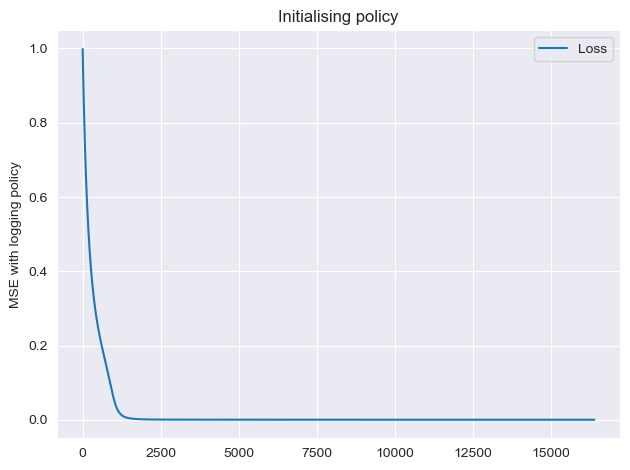

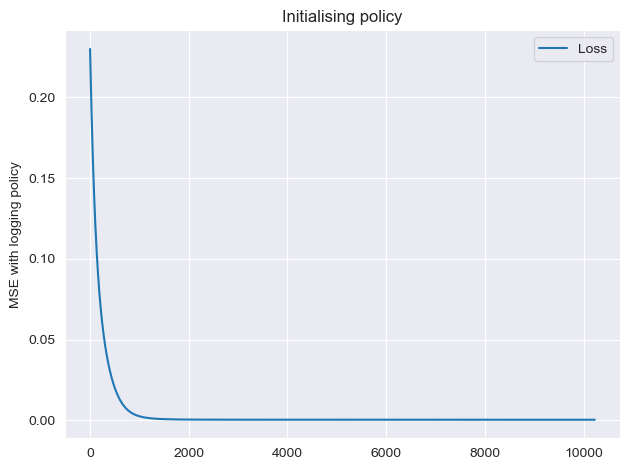

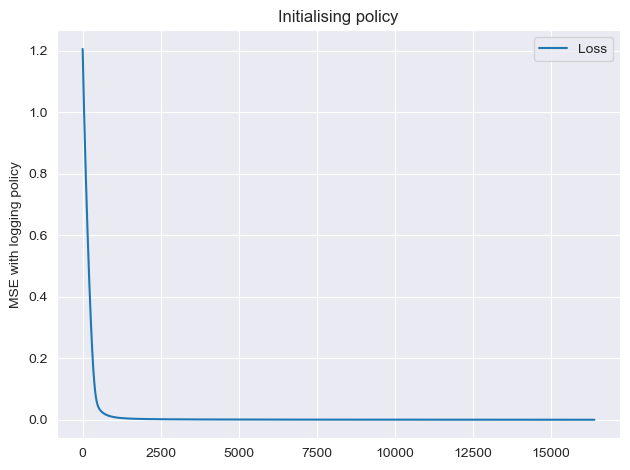

In [4]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

In [5]:
# data generation
# just take the first agent's data (dont know is it correct)
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'test':{}}


num_data = [52000, 8000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

In [6]:
offline_data_key = {'context': 0, 'estimated_CTR': 5, 'value': 6, 'bid': 7, 'gamma': 8, 'true_CTR': 9, 'price': 10, 'second_price': 11, 'won_mask': 12, 'outcome': 13, 'utility': 14}

In [11]:
estimator = "DR"
competition = "L"
data_dir = f"../data_{estimator}_{competition}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [31]:
import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action as Agent
from c_utree_boost import Problem

In [32]:
problem = Problem.Problem(games_directory="../data_DR_L_split/train/")

CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000,
                            check_fringe_freq=1200, is_episodic=0, training_mode='')

In [33]:
CUTreeAgent.get_prediction(save_path="", read_game_number=100)

<ipykernel.iostream.OutStream object at 0x107324c10> starting from 100
<ipykernel.iostream.OutStream object at 0x107324c10> finishing read tree


OSError: ../../data_DR_L/train_0.csv not found.

In [7]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [10]:
train_data = read_csv_game_record_auction("../data_DR_L/train_0.csv")

In [11]:
test_data = read_csv_game_record_auction("../data_DR_L/test_0.csv")

In [75]:
def gridSearch(model, param_grid, input_data, output_data):
    grid_cv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1).fit(input_data, output_data)
    print("Param for GS", grid_cv.best_params_)
    print("CV score for GS", grid_cv.best_score_)
    return grid_cv.best_estimator_

In [13]:
param_grid = {
    'max_depth': [3, 5, 10 ],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15]
}
model = tree.DecisionTreeRegressor()
# should I set random state here?
# mb k-fold is not nesscary here
# input_data = np.hstack((trained_data[0][:, :5], trained_data[0][:, 5].reshape(-1, 1)))

In [14]:
input_train_data = train_data[:, :5]
label_train_data = train_data[:, 7]
print("Agent", 0)
best_estimator = model.fit(input_train_data, label_train_data)
input_test_data = test_data[:, :5]
label_test_data = test_data[:, 7]
print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

train_preds = best_estimator.predict(input_train_data)
test_preds = best_estimator.predict(input_test_data)
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Test R2 score: 0.9129411592739474
Train MSE:  0.0
Test MSE:  0.007207238645199837


In [335]:
# context with bid
context_bid_estimators = {}
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators[agent_id] = best_estimator

# cv fault is 5

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.8176589926186019
Test R2 score: 0.8140933677974058
Train MSE:  0.007650941469051551
Test MSE:  0.01050469798816791
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8241300654742915
Test R2 score: 0.8262519598245776
Train MSE:  0.008002951115046422
Test MSE:  0.010185290434694504
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8468721778272357
Test R2 score: 0.8615227017000935
Train MSE:  0.004616595333144728
Test MSE:  0.005810678717675525


In [299]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.024177103849533664
Surrogate utility: 0.022457464446702585
R2 score: 0.7480383951257003
Agent: 1
Original utility: -0.011352402715902469
Surrogate utility: -0.011976056842977778
R2 score: 0.8697296504394383
Agent: 2
Original utility: 0.04247413235161559
Surrogate utility: 0.04326502529411769
R2 score: 0.9007667259100549


<AxesSubplot:>

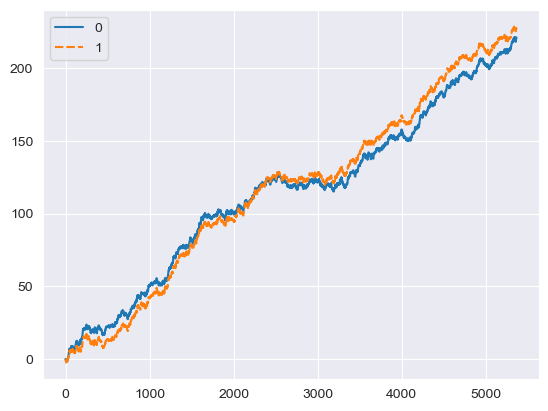

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

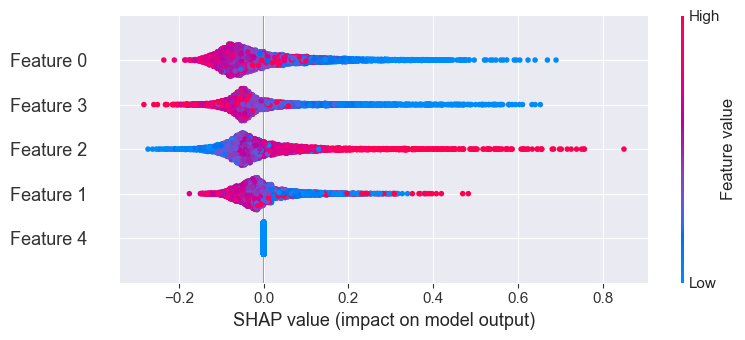

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2